# Training Neural Networks using Backpropagation
---

## Import Libraries

In [613]:
%matplotlib inline
from fastai.basics import *

## Load MNIST

In [616]:
path = Config().data_path()/'mnist'
path.ls()

[PosixPath('/home/aman/.fastai/data/mnist/mnist.pkl.gz')]

In [617]:
with gzip.open(path/'mnist.pkl.gz', 'r') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

(50000, 784) (50000,) (10000, 784) (10000,)


5

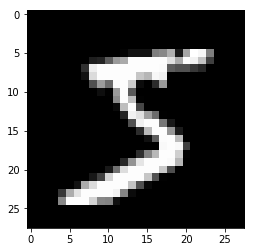

In [618]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
y_train[0]

## MNIST DataLoader

In [619]:
(x_train, y_train, x_valid, y_valid) = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [620]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

In [621]:
train_dl = DataLoader(train_ds, batch_size=bs)
valid_dl = DataLoader(valid_ds, batch_size=bs)

In [622]:
(x_i, y_i) = next(iter(train_dl))
x_i.shape, y_i.shape

(torch.Size([64, 784]), torch.Size([64]))

## MNIST Logistic

In [650]:
class MNIST_Logistic(nn.Module):
    def __init__(self):
        super(MNIST_Logistic,self).__init__()
        self.lin = nn.Linear(784, 10, bias=True)
    
    def forward(self, x):
        return self.lin(x)

In [624]:
model = MNIST_Logistic()

In [625]:
model

MNIST_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [626]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [627]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [628]:
loss_fn = nn.CrossEntropyLoss()

## SGD

In [629]:
lr=2e-2

In [630]:
def update(x,y,lr):
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr*p.grad)
            p.grad.zero_()
    return loss.item()

In [631]:
losses = [update(x,y,lr) for x,y in train_dl]

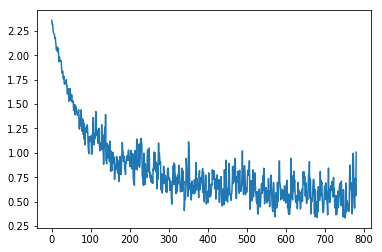

In [632]:
plt.plot(losses)

In [633]:
y_hat = model(x_i)

In [634]:
y_hat.max(dim=1)

(tensor([2.8256, 6.7555, 2.8237, 4.2022, 4.3387, 3.0551, 3.9512, 4.9275, 3.7178,
         4.0180, 5.1516, 1.6045, 7.1093, 4.4414, 4.0692, 5.0913, 3.7374, 3.0944,
         2.1593, 1.8372, 5.2728, 6.2933, 1.8986, 3.9988, 1.1659, 5.0148, 2.3160,
         8.0217, 4.7516, 1.5774, 2.4702, 3.4592, 4.3425, 3.4413, 2.8435, 2.0421,
         4.9654, 5.5930, 3.1920, 4.5924, 4.8528, 3.6268, 3.2177, 2.4570, 2.5954,
         5.0481, 3.1721, 3.8127, 2.2846, 5.7465, 4.2673, 7.5098, 6.4097, 1.7224,
         3.2830, 3.7225, 7.3208, 3.4822, 4.9094, 4.3566, 3.1740, 2.6690, 4.0108,
         5.7899], grad_fn=<MaxBackward0>),
 tensor([3, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 2, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
         6, 2, 4, 3, 7, 7, 3, 8, 6, 7, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
         5, 3, 3, 0, 7, 1, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0]))

In [635]:
y_i

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

## SGD with L2 Regularization (Weight Decay)

In [39]:
model = MNIST_Logistic()

In [40]:
wd=1e-3

In [41]:
def update(x,y,lr):
    y_hat = model(x)
    wd2=0.
    for p in model.parameters(): wd2+=wd*(p**2).sum()
    loss = loss_fn(y_hat, y)+wd2
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr*p.grad)
            p.grad.zero_()
    return loss.item()

In [42]:
losses = [update(x,y,lr) for x,y in train_dl]

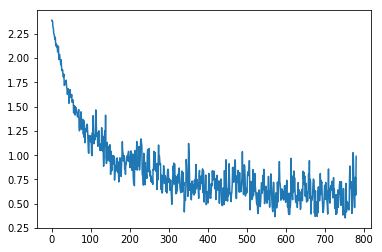

In [43]:
plt.plot(losses)

## MNIST NN

In [44]:
class MNIST_NN(nn.Module):
    def __init__(self):
        super(MNIST_NN,self).__init__()
        self.h1 = nn.Linear(784, 50, bias=True)
        self.h2 = nn.Linear(50, 10, bias=True)
    
    def forward(self, x):
        x = self.h1(x)
        x = F.relu(x)
        x = self.h2(x)
        return x

In [45]:
model = MNIST_NN()

In [46]:
model

MNIST_NN(
  (h1): Linear(in_features=784, out_features=50, bias=True)
  (h2): Linear(in_features=50, out_features=10, bias=True)
)

In [47]:
lr = 1e-2
wd=1e-5

In [48]:
losses = [update(x,y,lr) for x,y in train_dl]

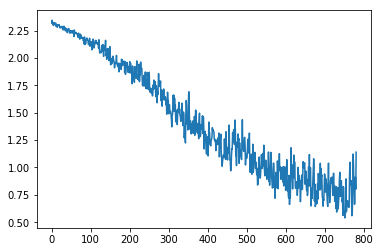

In [49]:
plt.plot(losses)

## Built-in ADAM Optimizer

In [50]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [51]:
model = MNIST_NN()

In [52]:
model

MNIST_NN(
  (h1): Linear(in_features=784, out_features=50, bias=True)
  (h2): Linear(in_features=50, out_features=10, bias=True)
)

In [53]:
lr = 1e-3

In [54]:
losses = [update(x,y,lr) for x,y in train_dl]

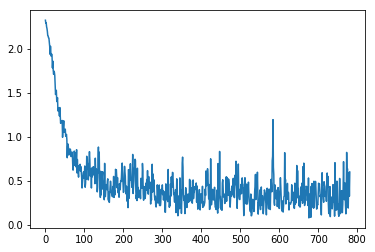

In [55]:
plt.plot(losses)

## Built-in fastai

In [56]:
model = MNIST_NN()

In [57]:
data = DataBunch.create(train_ds, valid_ds)

In [58]:
learner = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [59]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


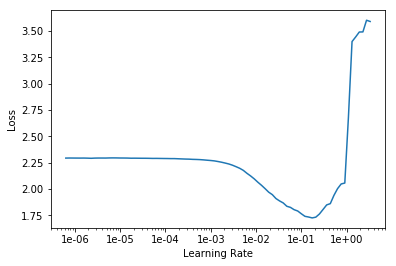

In [60]:
learner.recorder.plot()

In [61]:
learner.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.208741,0.195639,0.941500,00:02
1,0.126364,0.122462,0.964100,00:02
2,0.071210,0.093715,0.972300,00:02


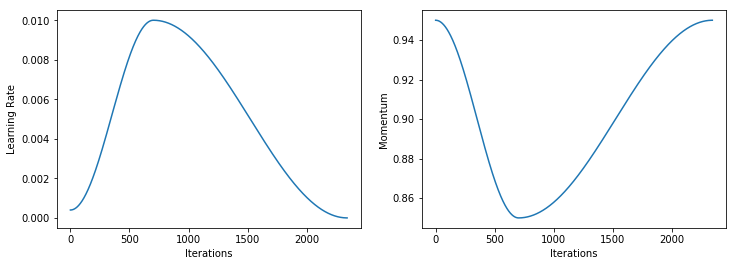

In [62]:
learner.recorder.plot_lr(show_moms=True)

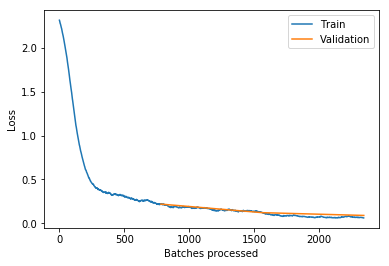

In [171]:
learner.recorder.plot_losses()

## Custom Layer with initialization

**NOTE:**
Kaiming He initialization really works

In [175]:
class custom(nn.Module):
    
    def __init__(self, in_features, out_features):
        super(custom, self).__init__()
        self.in_feat = in_features
        self.out_feat = out_features
        #self.weights = torch.nn.parameter.Parameter(torch.Tensor(np.random.uniform(-1,1,[self.in_feat, self.out_feat])))
        #self.bias = torch.nn.parameter.Parameter(torch.Tensor(np.random.uniform(-1,1,self.out_feat)))
        self.weights = torch.nn.parameter.Parameter(torch.Tensor(self.in_feat, self.out_feat))
        self.bias = torch.nn.parameter.Parameter(torch.Tensor(self.out_feat))
        self.reset_parameters()
        
    def forward(self, input):
        output = input.matmul(self.weights) + self.bias
        return output
    
    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5))
        if self.bias is not None:
            fan_in, _ = torch.nn.init._calculate_fan_in_and_fan_out(self.weights)
            bound = 1 / math.sqrt(fan_in)
            torch.nn.init.uniform_(self.bias, -bound, bound)
    
    def extra_repr(self):
        return "Input Features={} Output Features={}, Bias{}".format(
            self.in_feat, self.out_feat, self.bias is not None)

In [176]:
l1 = custom(3,10)

In [177]:
l1

custom(Input Features=3 Output Features=10, BiasTrue)

In [178]:
l1.weights, l1.bias

(Parameter containing:
 tensor([[ 0.2439,  0.0167,  0.1050, -0.0023, -0.3129,  0.0306, -0.2719, -0.1433,
          -0.2951, -0.1379],
         [ 0.2002, -0.1728,  0.1359, -0.3032, -0.1686,  0.3073, -0.2645, -0.0464,
          -0.2246,  0.2826],
         [ 0.2741,  0.0574, -0.2201, -0.2897, -0.1206, -0.0846, -0.1259, -0.1428,
           0.1869,  0.2570]], requires_grad=True), Parameter containing:
 tensor([ 0.2432, -0.1748,  0.2556,  0.0235, -0.2630, -0.1340, -0.1715,  0.2081,
          0.0765,  0.2728], requires_grad=True))

In [179]:
params = [p.shape for p in l1.parameters()]

In [180]:
params

[torch.Size([3, 10]), torch.Size([10])]

In [181]:
class MNIST_custom(nn.Module):
    def __init__(self):
        super(MNIST_custom,self).__init__()
        self.h1 = custom(784, 50)
        self.h2 = custom(50, 10)
    
    def forward(self, x):
        x = self.h1(x)
        x = F.relu(x)
        x = self.h2(x)
        return x

In [182]:
model = MNIST_custom()

In [183]:
model(x_i).shape

torch.Size([64, 10])

In [184]:
lr=1e-3

In [185]:
losses = [update(x, y, lr) for x,y in train_dl]

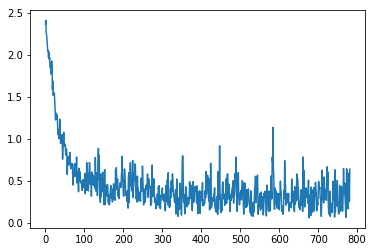

In [186]:
plt.plot(losses)

In [187]:
losses = [update(x, y, 1e-5) for x,y in train_dl]

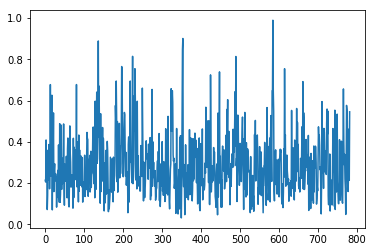

In [188]:
plt.plot(losses)

## Analyzing Gradients

In [528]:
x = torch.ones(100, 2)
x[:,0].uniform_(-1,1)
fn = torch.tensor([3.,2.])
# y = x@fn + torch.rand(100)
y = x@fn

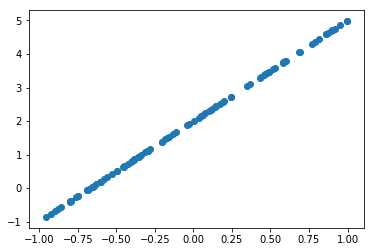

In [529]:
plt.scatter(x[:,0], y)

In [530]:
train_ds = TensorDataset(x[:,0],y)
train_dl = DataLoader(train_ds, batch_size=1)

In [531]:
L = nn.Linear(1,1)
L

Linear(in_features=1, out_features=1, bias=True)

In [532]:
[p for p in L.parameters()]

[Parameter containing:
 tensor([[-0.1299]], requires_grad=True), Parameter containing:
 tensor([0.1134], requires_grad=True)]

In [533]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [534]:
import copy

def update(model,x,y,lr):
    output = model(x)
    loss = mse(output, y)
    loss.backward()
    grads = list()
    wts = list()
    with torch.no_grad():
        for p in model.parameters():
            wts.append(deepcopy(p))
            grads.append(deepcopy(p.grad))
            p-=lr*p.grad
            p.grad.zero_()
    return [grads,wts]

In [535]:
epochs=5

In [536]:
logs = np.array([[update(L,x,y,1e-2) for x,y in train_dl] for i in range(epochs)])

In [537]:
a_wts = logs[:,:,1,0].flatten()
b_wts = logs[:,:,1,1].flatten()
a_grads = logs[:,:,0,0].flatten()
b_grads = logs[:,:,0,1].flatten()

In [541]:
n = np.array([1,2,3])

In [542]:
n.cumsum()

array([1, 3, 6])

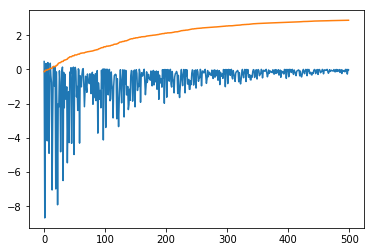

In [545]:
plt.plot(a_grads)
plt.plot(a_wts)

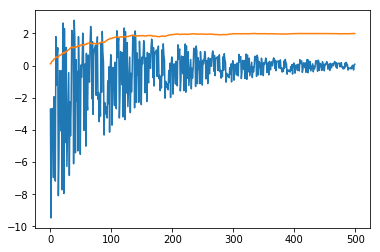

In [539]:
plt.plot(b_grads)
plt.plot(b_wts)

In [540]:
[p for p in L.parameters()]

[Parameter containing:
 tensor([[2.8737]], requires_grad=True), Parameter containing:
 tensor([1.9932], requires_grad=True)]

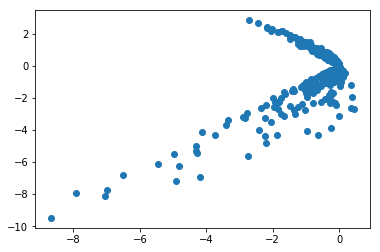

In [548]:
plt.scatter(a_grads, b_grads)

## Custom Optimizers

In [591]:
x = torch.ones(500, 2)
x[:,0].uniform_(-1,1)
fn = torch.tensor([3.,2.])
# y = x@fn + torch.rand(100)
y = x@fn

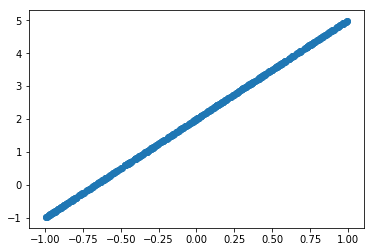

In [592]:
plt.scatter(x[:,0], y)

In [593]:
train_ds = TensorDataset(x[:,0],y)
train_dl = DataLoader(train_ds, batch_size=1)

In [594]:
L = nn.Linear(1,1)
L

Linear(in_features=1, out_features=1, bias=True)

In [595]:
[p for p in L.parameters()]

[Parameter containing:
 tensor([[0.4520]], requires_grad=True), Parameter containing:
 tensor([0.3223], requires_grad=True)]

In [596]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [597]:
def update(model,x,y,lr, mom=0.9):
    output = model(x)
    loss = mse(output, y)
    loss.backward()
    update=[torch.zeros(1),torch.zeros(1)]
    with torch.no_grad():
        for i,p in enumerate(model.parameters()):
            update[i] = mom*update[i] + (1-mom)*p.grad
            p.sub_(lr*update[i])
            p.grad.zero_()
    return loss.item()

In [598]:
losses = [update(L,x,y,5e-2) for x,y in train_dl]

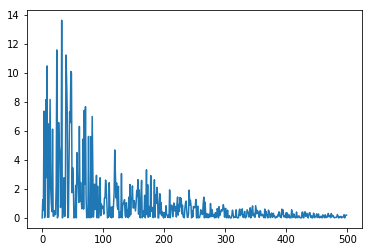

In [599]:
plt.plot(losses)

In [600]:
[p for p in L.parameters()]

[Parameter containing:
 tensor([[2.5136]], requires_grad=True), Parameter containing:
 tensor([1.9941], requires_grad=True)]

## Adam with learning rate annealing

In [643]:
opt = optim.SGD(model.parameters(),lr=0.01)

In [644]:
opt.__getstate__()

{'state': defaultdict(dict, {}),
 'param_groups': [{'params': [Parameter containing:
    tensor([[ 0.0218, -0.0006,  0.0023,  ..., -0.0165,  0.0148, -0.0352],
            [-0.0142,  0.0302, -0.0070,  ..., -0.0085, -0.0226, -0.0331],
            [-0.0025, -0.0016,  0.0137,  ..., -0.0035,  0.0216,  0.0040],
            ...,
            [-0.0355,  0.0279,  0.0261,  ...,  0.0227, -0.0232, -0.0058],
            [ 0.0207,  0.0286, -0.0034,  ..., -0.0316, -0.0186,  0.0090],
            [-0.0174, -0.0167,  0.0242,  ...,  0.0051, -0.0333,  0.0239]],
           requires_grad=True), Parameter containing:
    tensor([-0.0961,  0.1038, -0.0376, -0.0284,  0.0576,  0.0823,  0.0046,  0.0938,
            -0.1798,  0.0069], requires_grad=True)],
   'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False}]}

In [645]:
opt.__repr__

<bound method Optimizer.__repr__ of SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)>

In [646]:
opt.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [140312982547696, 140312982546256]}]}

___

In [776]:
x = torch.ones(500, 2)
x[:,0].uniform_(-1,1)
fn = torch.tensor([3.,2.])
# y = x@fn + torch.rand(100)
y = x@fn

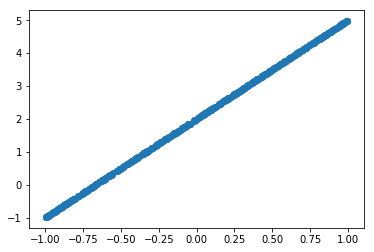

In [777]:
plt.scatter(x[:,0], y)

In [778]:
train_ds = TensorDataset(x[:,0],y)
train_dl = DataLoader(train_ds, batch_size=1)

In [779]:
L = nn.Linear(1,1)
L

Linear(in_features=1, out_features=1, bias=True)

In [780]:
[p for p in L.parameters()]

[Parameter containing:
 tensor([[0.6748]], requires_grad=True), Parameter containing:
 tensor([-0.0652], requires_grad=True)]

In [781]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [783]:
import torch
from torch.optim.optimizer import Optimizer, required

class SGD_(Optimizer):
    r"""Implements stochastic gradient descent (optionally with momentum).

    Nesterov momentum is based on the formula from
    `On the importance of initialization and momentum in deep learning`__.

    Args:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float): learning rate
        momentum (float, optional): momentum factor (default: 0)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        dampening (float, optional): dampening for momentum (default: 0)
        nesterov (bool, optional): enables Nesterov momentum (default: False)

    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> optimizer.zero_grad()
        >>> loss_fn(model(input), target).backward()
        >>> optimizer.step()

    __ http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf

    .. note::
        The implementation of SGD with Momentum/Nesterov subtly differs from
        Sutskever et. al. and implementations in some other frameworks.

        Considering the specific case of Momentum, the update can be written as

        .. math::
                  v = \rho * v + g \\
                  p = p - lr * v

        where p, g, v and :math:`\rho` denote the parameters, gradient,
        velocity, and momentum respectively.

        This is in contrast to Sutskever et. al. and
        other frameworks which employ an update of the form

        .. math::
             v = \rho * v + lr * g \\
             p = p - v

        The Nesterov version is analogously modified.
    """

    def __init__(self, params, lr=required, momentum=0, dampening=0,
                 weight_decay=0, nesterov=False):
        if lr is not required and lr < 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if momentum < 0.0:
            raise ValueError("Invalid momentum value: {}".format(momentum))
        if weight_decay < 0.0:
            raise ValueError("Invalid weight_decay value: {}".format(weight_decay))

        defaults = dict(lr=lr, momentum=momentum, dampening=dampening,
                        weight_decay=weight_decay, nesterov=nesterov)
        if nesterov and (momentum <= 0 or dampening != 0):
            raise ValueError("Nesterov momentum requires a momentum and zero dampening")
        super(SGD_, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(SGD_, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('nesterov', False)

    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()
        breakpoint()
        for group in self.param_groups:
            weight_decay = group['weight_decay']
            momentum = group['momentum']
            dampening = group['dampening']
            nesterov = group['nesterov']

            for p in group['params']:
                if p.grad is None:
                    continue
                d_p = p.grad.data
                if weight_decay != 0:
                    d_p.add_(weight_decay, p.data)
                if momentum != 0:
                    param_state = self.state[p]
                    if 'momentum_buffer' not in param_state:
                        buf = param_state['momentum_buffer'] = torch.zeros_like(p.data)
                        buf.mul_(momentum).add_(d_p)
                    else:
                        buf = param_state['momentum_buffer']
                        buf.mul_(momentum).add_(1 - dampening, d_p)
                    if nesterov:
                        d_p = d_p.add(momentum, buf)
                    else:
                        d_p = buf

                p.data.add_(-group['lr'], d_p)
        return loss

In [784]:
def update(model,x,y,lr):
    opt = SGD_(model.parameters(), lr, momentum=0.9)
    output = model(x)
    loss = mse(output, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return opt.param_groups

In [774]:
for x,y in train_dl:
    x_i=x
    y_i=y
    break

In [ ]:
losses = [update(L,x_i,y_i,lr) for x,y in train_dl]

> <ipython-input-783-e7e78b931f22>(81)step()
-> for group in self.param_groups:


(Pdb)  l


 76  	        """
 77  	        loss = None
 78  	        if closure is not None:
 79  	            loss = closure()
 80  	        breakpoint()
 81  ->	        for group in self.param_groups:
 82  	            weight_decay = group['weight_decay']
 83  	            momentum = group['momentum']
 84  	            dampening = group['dampening']
 85  	            nesterov = group['nesterov']
 86  	


In [750]:
d

[{'params': [Parameter containing:
   tensor([[3.0000]], requires_grad=True), Parameter containing:
   tensor([2.0000], requires_grad=True)],
  'lr': 0.01,
  'momentum': 0.9,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False}]

In [754]:
for group in d:
    for p in group['params']:
        print(p.grad.data)

tensor([[0.]])
tensor([0.])
